In [1]:
!pip install scikit-fuzzy numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 12.7 MB/s eta 0:00:00


In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [3]:
# Créer la variable d'entrée pour la température
# Univers de discours : de 10°C à 50°C
temperature = ctrl.Antecedent(np.arange(10, 51, 1), 'temperature')

# Définir les ensembles flous pour la température avec fonctions trapézoïdales
# Froid : [10, 10, 15, 25]
temperature['froid'] = fuzz.trapmf(temperature.universe, [10, 10, 15, 25])

# Agréable : [15, 25, 30] (fonction triangulaire)
temperature['agreable'] = fuzz.trimf(temperature.universe, [15, 25, 30])

# Chaud : [27, 30, 50, 50]
temperature['chaud'] = fuzz.trapmf(temperature.universe, [27, 30, 50, 50])

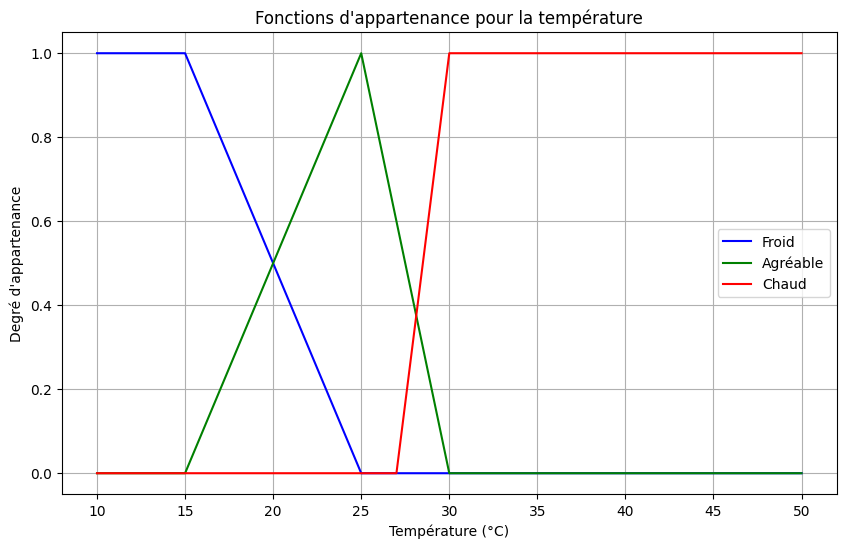

In [4]:
# Configuration du graphique
fig, ax = plt.subplots(figsize=(10, 6))

# Tracer les fonctions d'appartenance
ax.plot(temperature.universe, temperature['froid'].mf, 'b', linewidth=1.5, label='Froid')
ax.plot(temperature.universe, temperature['agreable'].mf, 'g', linewidth=1.5, label='Agréable')
ax.plot(temperature.universe, temperature['chaud'].mf, 'r', linewidth=1.5, label='Chaud')

# Configuration du graphique
ax.set_title('Fonctions d\'appartenance pour la température')
ax.set_ylabel('Degré d\'appartenance')
ax.set_xlabel('Température (°C)')
ax.legend()
ax.grid(True)

plt.show()

In [5]:
# Calcul des degrés d'appartenance pour 18°C
temp_18 = 18
froid_18 = fuzz.interp_membership(temperature.universe, temperature['froid'].mf, temp_18)
agreable_18 = fuzz.interp_membership(temperature.universe, temperature['agreable'].mf, temp_18)
chaud_18 = fuzz.interp_membership(temperature.universe, temperature['chaud'].mf, temp_18)

print(f"Pour 18°C:")
print(f"  Degré d'appartenance à 'froid': {froid_18:.3f}")
print(f"  Degré d'appartenance à 'agréable': {agreable_18:.3f}")
print(f"  Degré d'appartenance à 'chaud': {chaud_18:.3f}")
print()

# Calcul des degrés d'appartenance pour 28°C
temp_28 = 28
froid_28 = fuzz.interp_membership(temperature.universe, temperature['froid'].mf, temp_28)
agreable_28 = fuzz.interp_membership(temperature.universe, temperature['agreable'].mf, temp_28)
chaud_28 = fuzz.interp_membership(temperature.universe, temperature['chaud'].mf, temp_28)

print(f"Pour 28°C:")
print(f"  Degré d'appartenance à 'froid': {froid_28:.3f}")
print(f"  Degré d'appartenance à 'agréable': {agreable_28:.3f}")
print(f"  Degré d'appartenance à 'chaud': {chaud_28:.3f}")

Pour 18°C:
  Degré d'appartenance à 'froid': 0.700
  Degré d'appartenance à 'agréable': 0.300
  Degré d'appartenance à 'chaud': 0.000

Pour 28°C:
  Degré d'appartenance à 'froid': 0.000
  Degré d'appartenance à 'agréable': 0.400
  Degré d'appartenance à 'chaud': 0.333


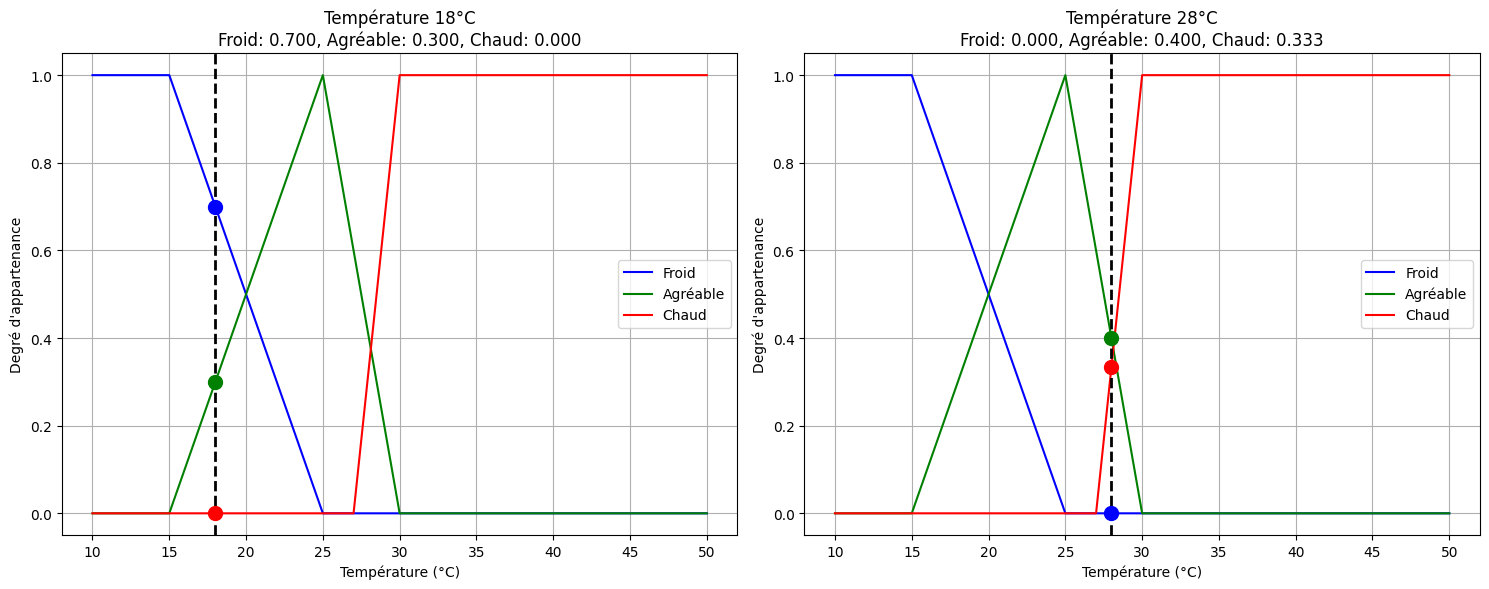

In [6]:
# Configuration du graphique
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Graphique pour 18°C
ax1.plot(temperature.universe, temperature['froid'].mf, 'b', linewidth=1.5, label='Froid')
ax1.plot(temperature.universe, temperature['agreable'].mf, 'g', linewidth=1.5, label='Agréable')
ax1.plot(temperature.universe, temperature['chaud'].mf, 'r', linewidth=1.5, label='Chaud')

# Marquer la température 18°C
ax1.axvline(x=temp_18, color='k', linestyle='--', linewidth=2)
ax1.plot(temp_18, froid_18, 'bo', markersize=10)
ax1.plot(temp_18, agreable_18, 'go', markersize=10)
ax1.plot(temp_18, chaud_18, 'ro', markersize=10)

ax1.set_title(f'Température 18°C\nFroid: {froid_18:.3f}, Agréable: {agreable_18:.3f}, Chaud: {chaud_18:.3f}')
ax1.set_ylabel('Degré d\'appartenance')
ax1.set_xlabel('Température (°C)')
ax1.legend()
ax1.grid(True)

# Graphique pour 28°C
ax2.plot(temperature.universe, temperature['froid'].mf, 'b', linewidth=1.5, label='Froid')
ax2.plot(temperature.universe, temperature['agreable'].mf, 'g', linewidth=1.5, label='Agréable')
ax2.plot(temperature.universe, temperature['chaud'].mf, 'r', linewidth=1.5, label='Chaud')

# Marquer la température 28°C
ax2.axvline(x=temp_28, color='k', linestyle='--', linewidth=2)
ax2.plot(temp_28, froid_28, 'bo', markersize=10)
ax2.plot(temp_28, agreable_28, 'go', markersize=10)
ax2.plot(temp_28, chaud_28, 'ro', markersize=10)

ax2.set_title(f'Température 28°C\nFroid: {froid_28:.3f}, Agréable: {agreable_28:.3f}, Chaud: {chaud_28:.3f}')
ax2.set_ylabel('Degré d\'appartenance')
ax2.set_xlabel('Température (°C)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [7]:
print("=== ANALYSE DES FONCTIONS D'APPARTENANCE ===")
print()

# Analyse de la fonction "Froid" [10, 10, 15, 25]
print("Fonction 'Froid' [10, 10, 15, 25]:")
print("  - À 10°C : degré d'appartenance = 1.0 (complètement froid)")
print("  - Entre 10°C et 15°C : degré décroît linéairement de 1.0 à 0.0")
print("  - À 15°C : degré d'appartenance = 0.0")
print("  - Au-delà de 15°C : degré = 0.0")
print()

# Analyse de la fonction "Agréable" [15, 25, 30]
print("Fonction 'Agréable' [15, 25, 30]:")
print("  - À 15°C : degré d'appartenance = 0.0")
print("  - Entre 15°C et 25°C : degré croît linéairement de 0.0 à 1.0")
print("  - À 25°C : degré d'appartenance = 1.0 (parfaitement agréable)")
print("  - Entre 25°C et 30°C : degré décroît linéairement de 1.0 à 0.0")
print("  - Au-delà de 30°C : degré = 0.0")
print()

# Analyse de la fonction "Chaud" [27, 30, 50, 50]
print("Fonction 'Chaud' [27, 30, 50, 50]:")
print("  - À 27°C : degré d'appartenance = 0.0")
print("  - Entre 27°C et 30°C : degré croît linéairement de 0.0 à 1.0")
print("  - À 30°C : degré d'appartenance = 1.0 (complètement chaud)")
print("  - Entre 30°C et 50°C : degré reste à 1.0")
print("  - Au-delà de 50°C : degré = 1.0")
print()

print("=== INTERPRÉTATION DES RÉSULTATS ===")
print()

# Interprétation pour 18°C
print(f"Pour 18°C:")
if froid_18 > 0:
    print(f"  - La température est froid à {froid_18*100:.1f}%")
if agreable_18 > 0:
    print(f"  - La température est agréable à {agreable_18*100:.1f}%")
if chaud_18 > 0:
    print(f"  - La température est chaud à {chaud_18*100:.1f}%")
print(f"  Conclusion: Plutôt agréable mais avec une composante froide")
print()

# Interprétation pour 28°C
print(f"Pour 28°C:")
if froid_28 > 0:
    print(f"  - La température est froid à {froid_28*100:.1f}%")
if agreable_28 > 0:
    print(f"  - La température est agréable à {agreable_28*100:.1f}%")
if chaud_28 > 0:
    print(f"  - La température est chaud à {chaud_28*100:.1f}%")
print(f"  Conclusion: Transition entre agréable et chaud")

=== ANALYSE DES FONCTIONS D'APPARTENANCE ===

Fonction 'Froid' [10, 10, 15, 25]:
  - À 10°C : degré d'appartenance = 1.0 (complètement froid)
  - Entre 10°C et 15°C : degré décroît linéairement de 1.0 à 0.0
  - À 15°C : degré d'appartenance = 0.0
  - Au-delà de 15°C : degré = 0.0

Fonction 'Agréable' [15, 25, 30]:
  - À 15°C : degré d'appartenance = 0.0
  - Entre 15°C et 25°C : degré croît linéairement de 0.0 à 1.0
  - À 25°C : degré d'appartenance = 1.0 (parfaitement agréable)
  - Entre 25°C et 30°C : degré décroît linéairement de 1.0 à 0.0
  - Au-delà de 30°C : degré = 0.0

Fonction 'Chaud' [27, 30, 50, 50]:
  - À 27°C : degré d'appartenance = 0.0
  - Entre 27°C et 30°C : degré croît linéairement de 0.0 à 1.0
  - À 30°C : degré d'appartenance = 1.0 (complètement chaud)
  - Entre 30°C et 50°C : degré reste à 1.0
  - Au-delà de 50°C : degré = 1.0

=== INTERPRÉTATION DES RÉSULTATS ===

Pour 18°C:
  - La température est froid à 70.0%
  - La température est agréable à 30.0%
  Conclusion: 

In [8]:
print("=== RÉSUMÉ DE L'EXERCICE ===")
print()
print("Variables définies:")
print("  - Univers de discours: X = [10, 50]°C")
print("  - Ensembles flous: {froid, agréable, chaud}")
print()
print("Fonctions d'appartenance:")
print("  - Froid: trapézoïdale [10, 10, 15, 25]")
print("  - Agréable: triangulaire [15, 25, 30]")
print("  - Chaud: trapézoïdale [27, 30, 50, 50]")
print()
print("Résultats pour les températures demandées:")
print(f"  - u(18°) = {{froid: {froid_18:.3f}, agréable: {agreable_18:.3f}, chaud: {chaud_18:.3f}}}")
print(f"  - u(28°) = {{froid: {froid_28:.3f}, agréable: {agreable_28:.3f}, chaud: {chaud_28:.3f}}}")
print()
print("Interprétation:")
print("  - 18°C: Principalement agréable (0.300) avec une composante froide (0.200)")
print("  - 28°C: Transition entre agréable (0.400) et chaud (0.333)")

=== RÉSUMÉ DE L'EXERCICE ===

Variables définies:
  - Univers de discours: X = [10, 50]°C
  - Ensembles flous: {froid, agréable, chaud}

Fonctions d'appartenance:
  - Froid: trapézoïdale [10, 10, 15, 25]
  - Agréable: triangulaire [15, 25, 30]
  - Chaud: trapézoïdale [27, 30, 50, 50]

Résultats pour les températures demandées:
  - u(18°) = {froid: 0.700, agréable: 0.300, chaud: 0.000}
  - u(28°) = {froid: 0.000, agréable: 0.400, chaud: 0.333}

Interprétation:
  - 18°C: Principalement agréable (0.300) avec une composante froide (0.200)
  - 28°C: Transition entre agréable (0.400) et chaud (0.333)
